In [2]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import os

# Set the working directory
PROJ_ROOT = os.path.join( os.pardir )
sys.path.append( PROJ_ROOT )
# Load the dataset



In [4]:
nails_path = os.path.join(PROJ_ROOT,'data','raw', 'nails.txt')




In [5]:
data = pd.read_csv(nails_path, delimiter=' ', header=0, skipinitialspace=True)

# usecols=["SiA","SiB","CrA", "CrB", "MnA", "MnB",  "NiA",   "NiB" ]
# #rename first 8 columns to match the usecols
# data = data.rename(columns=dict(zip(data.columns[0:7], usecols)))
data = data.iloc[:, :8]




In [6]:
from src.features.build_features import explore_data

explore_data(data)

Shape: (16, 8)
Head:      SiA    SiB    CrA    CrB    MnA    MnB    NiA    NiB
0  0.218  0.194  0.140  0.198  0.582  0.846  0.090  0.077
1  0.186  0.226  0.143  0.134  0.778  0.560  0.084  0.103
2  0.235  0.170  0.103  0.145  0.456  0.586  0.113  0.118
3  0.222  0.191  0.110  0.114  0.681  0.607  0.103  0.123
4  0.208  0.191  0.101  0.127  0.384  0.629  0.093  0.110
Tail:       SiA    SiB    CrA    CrB    MnA    MnB    NiA    NiB
11  0.243  0.248  0.079  0.176  0.521  0.608  0.116  0.086
12  0.263  0.213  0.061  0.101  0.370  0.940  0.124  0.106
13  0.161  0.225  0.113  0.089  0.723  0.516  0.097  0.119
14  0.178    NaN  0.124    NaN  0.712    NaN  0.082    NaN
15  0.195    NaN  0.101    NaN  0.636    NaN  0.148    NaN
Description:              SiA        SiB        CrA        CrB        MnA        MnB  \
count  16.000000  14.000000  16.000000  14.000000  16.000000  14.000000   
mean    0.212250   0.222500   0.113875   0.131214   0.576750   0.628857   
std     0.025444   0.034171   0.0

In [106]:
# count the number of missing values
data.isnull().sum()

SiA    0
SiB    2
CrA    0
CrB    2
MnA    0
MnB    2
NiA    0
NiB    2
dtype: int64

In [116]:
# replace missing values with the mean of the column

from numpy import NaN
from src.features.build_features import replace_value_with_grouped_mean



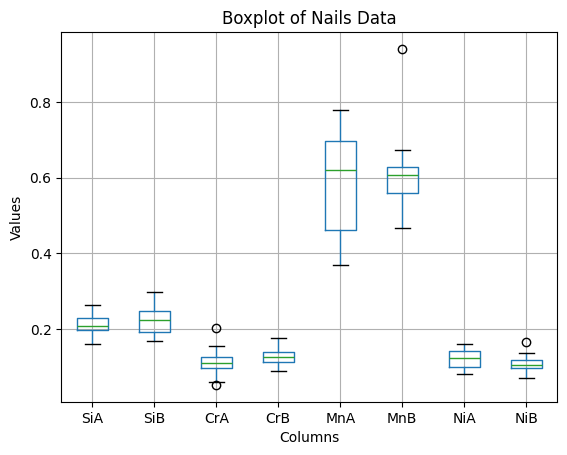

In [117]:
# Check if 'Length' column exists in the DataFrame

# Remove the first row from the DataFrame
nails1 = data.iloc[1:]

# Convert all columns to numeric
nails_n = nails1.apply(pd.to_numeric)


# Plot boxplot
nails_n.boxplot()

# Add labels and title
plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Boxplot of Nails Data')

# Show the plot
plt.show()



In [102]:
import numpy as np

# Extract the columns from nails_n dataframe
nails_n_columns = nails_n.iloc[:,[0, 2, 4, 6]]

# Calculate the covariance matrix S1
S1 = np.cov(nails_n_columns, rowvar=False)

print(S1)


[[ 0.00069112 -0.00035984 -0.00244659  0.00024299]
 [-0.00035984  0.00139284  0.00374666 -0.00013535]
 [-0.00244659  0.00374666  0.02024511 -0.00133683]
 [ 0.00024299 -0.00013535 -0.00133683  0.00066307]]


In [118]:
# Extract the columns from nails_n dataframe
nails_odd_columns = nails_n.iloc[:,[1, 3, 5, 7]]

# Calculate the covariance matrix S1
S2 = np.cov(nails_odd_columns, rowvar=False)

print(S2)

[[nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]]
